# Capstone 2: EDA (Match Winner Predictor)

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Importing Data

### Individual Player File

In [2]:
df_individual = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/df_individual.csv')
df_individual.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
df_individual.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,map,...,deaths_ct,kddiff_ct,adr_ct,kast_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,match_outcome
0,2020-02-27,Andersin,Thunder Logic,Station7,United States,14038,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,2,1,145.7,100.0,18,8,10,118.1,86.7,Win
1,2020-02-27,FrostayK,Station7,Thunder Logic,United States,12090,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,13,-5,62.5,60.0,1,3,-2,12.3,33.3,Loss
2,2020-02-27,Inseaniac,Thunder Logic,Station7,Canada,18623,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,0,5,192.3,100.0,15,7,8,80.8,86.7,Win
3,2020-02-27,PureR,Thunder Logic,Station7,United States,10622,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,0,4,63.7,100.0,14,9,5,96.5,86.7,Win
4,2020-02-27,Sharkie,Thunder Logic,Station7,United States,19476,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,0,3,58.3,100.0,10,7,3,77.9,86.7,Win


In [3]:
df_individual.shape

(130498, 30)

### Team Player File

In [4]:
df_team = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/df_team.csv')
df_team.head()

,match_id,team,date,opponent,event_name,map,kills,assists,deaths,hs,...,deaths_ct,kddiff_ct,adr_ct,kast_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,match_outcome
0,2300412,Natus Vincere,2016-01-22,SK,DreamHack ZOWIE Open Leipzig 2016,Mirage,15.0,3.2,9.2,5.8,...,2.2,1.2,89.26,70.00,11.6,7.0,4.6,81.66,76.00,Win
1,2300412,SK,2016-01-22,Natus Vincere,DreamHack ZOWIE Open Leipzig 2016,Mirage,9.2,2.6,15.0,4.6,...,11.6,-4.6,59.90,58.68,2.2,3.4,-1.2,67.88,55.00,Loss
2,2300413,FaZe,2016-01-22,Luminosity,DreamHack ZOWIE Open Leipzig 2016,Inferno,19.8,4.0,14.6,9.0,...,6.6,0.6,79.40,66.00,12.6,8.0,4.6,88.30,74.66,Win
3,2300413,Luminosity,2016-01-22,FaZe,DreamHack ZOWIE Open Leipzig 2016,Inferno,14.6,3.6,20.0,5.8,...,12.6,-4.6,69.12,52.00,6.6,7.4,-0.8,74.70,72.00,Loss
4,2300414,Astralis,2016-01-22,Dignitas,DreamHack ZOWIE Open Leipzig 2016,Overpass,18.2,2.4,13.0,7.2,...,6.6,-0.2,77.38,66.00,11.8,6.4,5.4,86.86,78.66,Win


In [5]:
df_team.shape

(26319, 26)

## Splitting the Data by Win/Loss

In [6]:
# Create a dataframe for individual player performance that resulted in wins.
df_individual_win = df_individual[df_individual.match_outcome == 'Win']
df_individual_win.sample(5)

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,map,...,deaths_ct,kddiff_ct,adr_ct,kast_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,match_outcome
87178,2017-09-09,Luz,PRIDE,LDLC,Poland,5385,2314655,3145,EPICENTER 2017 Europe Qualifier #2,Cobblestone,...,7,-2,69.8,55.6,14,8,6,86.1,80.0,Win
60185,2018-03-14,STYKO,mousesports,G2,Slovakia,6904,2319876,3361,ESL Pro League Season 7 Europe,Inferno,...,12,0,81.1,83.3,10,12,-2,54.3,66.7,Win
110057,2017-02-20,znajder,GODSENT,Endpoint,Sweden,3847,2308074,2672,ESEA MDL Season 24 Europe,Cache,...,2,1,41.4,80.0,18,7,11,136.3,80.0,Win
16640,2019-05-15,NBK-,Vitality,HAVU,France,7168,2333259,4501,ESEA MDL Season 31 Europe,Mirage,...,8,5,116.8,84.6,10,9,1,69.1,73.3,Win
48719,2018-06-08,theTRUTH,MDL Jammers,Swole Patrol,United States,15133,2323556,3688,ESEA MDL Season 28 North America,Overpass,...,9,3,85.7,80.0,5,10,-5,41.8,53.3,Win


In [7]:
# Create a dataframe for individual player performance that resulted in losses.
df_individual_loss = df_individual[df_individual.match_outcome == 'Loss']
df_individual_loss.sample(5)

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,map,...,deaths_ct,kddiff_ct,adr_ct,kast_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,match_outcome
22526,2019-02-19,maRky,Unicorns of Love,Valiance,Germany,7523,2331149,4287,ESEA MDL Season 30 Europe,Dust2,...,13,-3,64.4,72.2,15,12,3,67.9,61.1,Loss
15366,2019-05-26,CeRq,NRG,Liquid,Bulgaria,11219,2333382,4566,cs_summit 4,Vertigo,...,8,4,69.3,78.6,5,12,-7,48.7,46.7,Loss
117202,2016-10-14,byali,Virtus.pro,fnatic,Poland,5386,2305679,2495,ECS Season 2 Europe,Cobblestone,...,8,-2,91.8,37.5,17,11,6,106.4,73.3,Loss
50071,2018-05-29,landic,Wild,LiNE5 Academy,Brazil,2514,2322368,3651,ESL Brazil Premier League Season 5,Cache,...,9,-2,35.0,60.0,14,12,2,84.5,73.3,Loss
58579,2018-03-22,PKL,Luminosity,Splyce,Brazil,6593,2319543,3362,ESL Pro League Season 7 North America,Mirage,...,9,0,70.3,73.3,6,14,-8,53.6,50.0,Loss


In [8]:
# Create a dataframe for team player performance that resulted in wins.
df_team_win = df_team[df_team.match_outcome == 'Win']
df_team_win.sample(5)

,match_id,team,date,opponent,event_name,map,kills,assists,deaths,hs,...,deaths_ct,kddiff_ct,adr_ct,kast_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,match_outcome
13872,2320001,Pompa,2018-02-21,Royal Bandits,EsporBet.com Promo Cup,Mirage,21.0,5.0,21.2,9.6,...,8.0,4.2,85.62,75.98,8.8,13.2,-4.4,65.94,57.34,Win
11294,2316886,LFAO,2017-11-10,Beacon,ESEA MDL Season 26 North America,Nuke,19.0,5.0,12.2,8.6,...,8.8,3.4,87.34,80.00,6.8,3.4,3.4,95.74,91.42,Win
20142,2328118,mousesports,2018-11-14,NiP,ESL Pro League Season 8 Europe,Nuke,19.2,1.6,18.8,11.8,...,7.6,3.2,77.74,69.34,8.4,11.2,-2.8,62.06,55.98,Win
8782,2313999,Astralis,2017-11-08,Natus Vincere,ESL Pro League Season 6 Europe,Nuke,18.4,4.0,10.8,8.4,...,8.4,5.8,97.34,90.68,4.2,2.4,1.8,86.40,72.00,Win
4069,2307994,Eclipse,2017-02-16,Denial,ESEA MDL Season 24 North America,Cache,22.2,4.2,20.4,9.6,...,10.4,-0.2,78.68,69.32,12.0,10.0,2.0,85.54,77.34,Win


In [9]:
# Create a dataframe for team player performance that resulted in losses.
df_team_loss = df_team[df_team.match_outcome == 'Loss']
df_team_loss.sample(5)

,match_id,team,date,opponent,event_name,map,kills,assists,deaths,hs,...,deaths_ct,kddiff_ct,adr_ct,kast_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,match_outcome
14357,2320466,ex-Athletico,2018-03-07,Chiefs,ESL Australia & NZ Championship Season 6,Cobblestone,11.2,2.4,18.6,5.4,...,6.0,-4.2,46.86,36.66,9.4,12.6,-3.2,70.00,56.00,Loss
13748,2319932,fnatic,2018-03-22,North,ESL Pro League Season 7 Europe,Cobblestone,16.4,4.0,19.4,7.4,...,7.6,-0.8,78.08,70.00,9.6,11.8,-2.2,70.78,62.68,Loss
11382,2316961,FRENCH CANADIANS,2017-11-09,Iceberg,ESEA MDL Season 26 North America,Cache,15.2,2.8,19.4,7.4,...,7.0,-2.8,61.68,55.00,11.0,12.4,-1.4,77.82,71.98,Loss
16975,2324121,Winstrike,2018-06-22,Kinguin,ZOTAC Cup Masters 2018 Europe Regional Finals,Train,14.4,2.4,19.2,8.0,...,10.6,-1.8,64.26,66.66,5.6,8.6,-3.0,59.02,56.00,Loss
25314,2337521,Mythic,2019-10-31,INTZ,ESEA MDL Season 32 North America,Train,7.2,1.0,18.0,4.0,...,3.8,-1.6,59.94,50.00,5.0,14.2,-9.2,44.04,36.02,Loss


## Taking a Closer Look at the Individual Player Data

### Individual Player Performance - Win

In [10]:
# Summary statistics for wins.
df_individual_win.describe().T

,count,mean,std,min,25%,50%,75%,max
player_id,65704.0,8.797191e+03,4049.436630,7.0,7403.0,9030.0,11287.0,19988.0
match_id,65704.0,2.319656e+06,10325.985273,2300412.0,2311278.0,2319487.0,2327781.0,2339828.0
event_id,65704.0,3.415093e+03,779.477791,1690.0,2767.0,3374.0,3965.0,5224.0
kills,65704.0,1.972221e+01,5.597297,0.0,16.0,19.0,23.0,63.0
assists,65704.0,4.602186e+00,2.475996,0.0,3.0,4.0,6.0,20.0
deaths,65704.0,1.561666e+01,5.147700,0.0,12.0,15.0,19.0,57.0
hs,65704.0,8.803817e+00,3.856467,0.0,6.0,8.0,11.0,39.0
flash_assists,65704.0,1.126202e+00,1.202681,0.0,0.0,1.0,1.0,12.0
kast,65704.0,7.647433e+01,9.087857,40.7,70.0,76.2,82.6,100.0
kddiff,65704.0,4.105549e+00,6.200954,-23.0,0.0,4.0,8.0,31.0


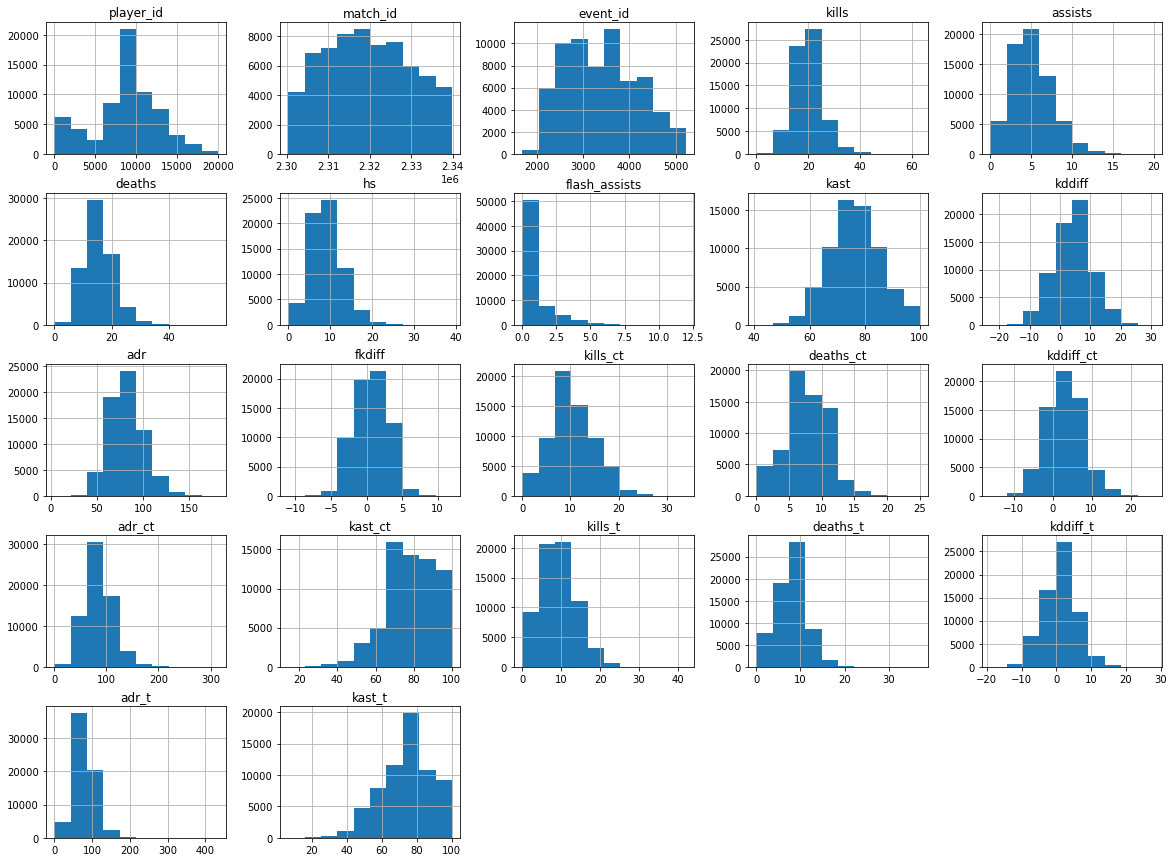

In [11]:
# Histogram for individual win features.
_ = df_individual_win.hist(bins = 10, figsize = (20,15))

Now we want to look closer at some of the categorical features in our data. We'll look at 'country' and 'map'. We are not interested in 'date', 'player_name', 'team', 'opponent', 'event_name', or 'match_outcome'. **Note:** While 'team' and 'opponent' likely impact the outcome of a match, we are not interested in how strength level of teams/opponents impact match outcomes, but rather just the match statistics.

<AxesSubplot:title={'center':'Country of Origin for Players that Won Match'}, xlabel='country', ylabel='count'>

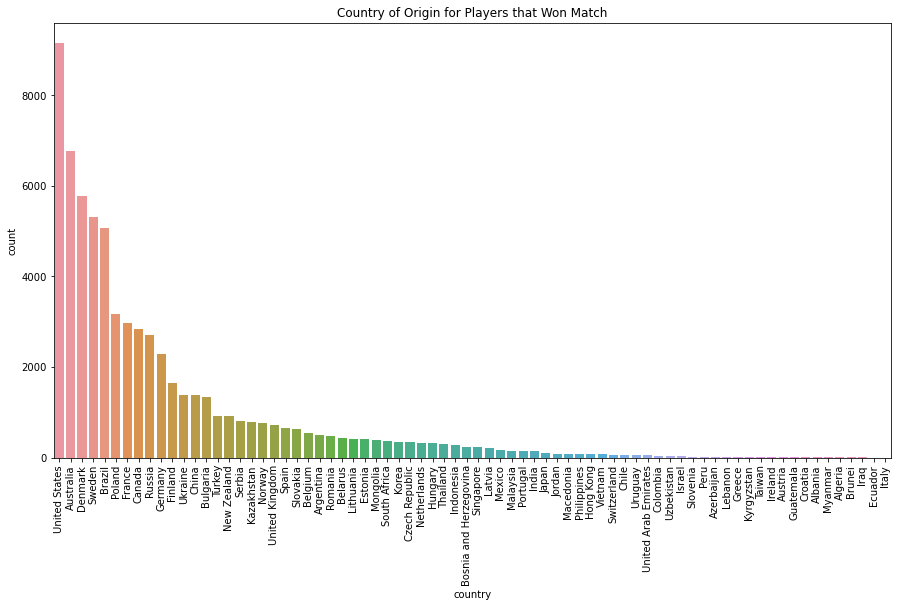

In [12]:
# Create a copy of the individual win dataframe only containing the categorical features.
df_individual_win_cat = df_individual_win.select_dtypes(include = 'object').copy()

# Countplot for the 'country' feature.
fig, ax = plt.subplots(figsize = (15,8))
plt.xticks(rotation = 90)
plt.title('Country of Origin for Players that Won Match')
sns.countplot(data = df_individual_win_cat, x = 'country', order = df_individual_win_cat['country'].value_counts().index)

<AxesSubplot:xlabel='map', ylabel='count'>

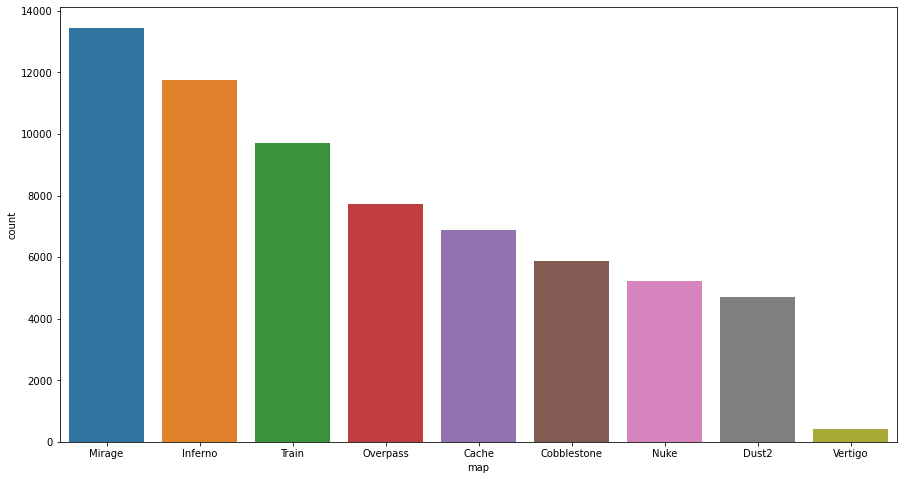

In [13]:
# Countplot for the 'map' feature.
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(data = df_individual_win_cat, x = 'map', order = df_individual_win_cat['map'].value_counts().index)

<AxesSubplot:>

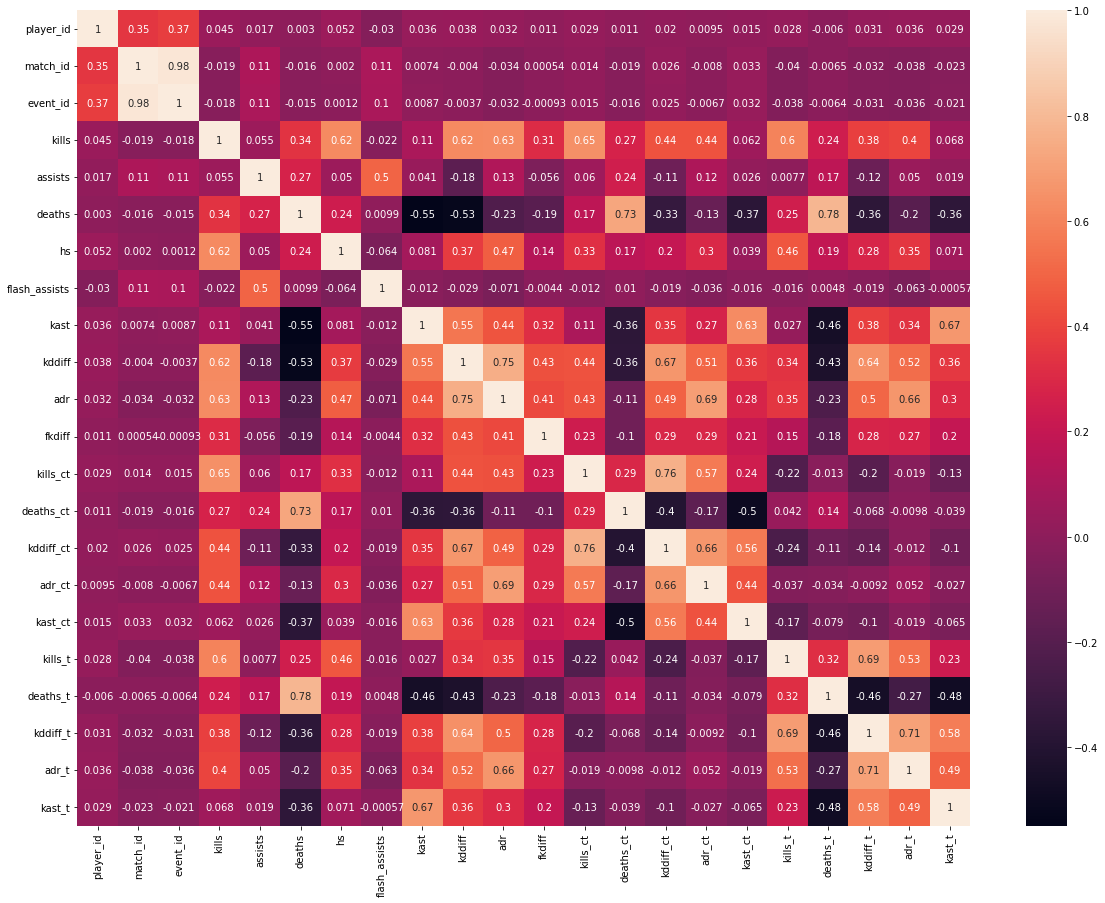

In [14]:
# Correlation heatmap
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_individual_win.corr(), annot = True)

It is worth noting that many of these features that have high correlation with other features are expected due to how they are calculated. For example, we would expect 'deaths' and 'deaths_ct' to be highly correlated (0.73) since the 'deaths' feature is simply 'deaths_t' + 'deaths_ct'.

### Individual Player Performance - Loss

In [15]:
# Summary statistics for losses.
df_individual_loss.describe().T

,count,mean,std,min,25%,50%,75%,max
player_id,64794.0,9.272219e+03,4288.704454,2.0,7511.0,9217.0,11941.0,19995.0
match_id,64794.0,2.319658e+06,10328.992167,2300412.0,2311279.0,2319489.0,2327784.0,2339828.0
event_id,64794.0,3.415120e+03,779.511791,1690.0,2767.0,3374.0,3965.0,5224.0
kills,64794.0,1.570926e+01,6.276077,0.0,11.0,15.0,19.0,75.0
assists,64794.0,3.658996e+00,2.315981,0.0,2.0,3.0,5.0,20.0
deaths,64794.0,1.979406e+01,3.331350,1.0,18.0,19.0,21.0,53.0
hs,64794.0,7.241180e+00,3.717549,0.0,5.0,7.0,9.0,38.0
flash_assists,64794.0,8.992345e-01,1.026369,0.0,0.0,1.0,1.0,13.0
kast,64794.0,6.221918e+01,10.477424,15.8,55.6,63.0,69.6,100.0
kddiff,64794.0,-4.084792e+00,5.553919,-26.0,-8.0,-5.0,-1.0,30.0


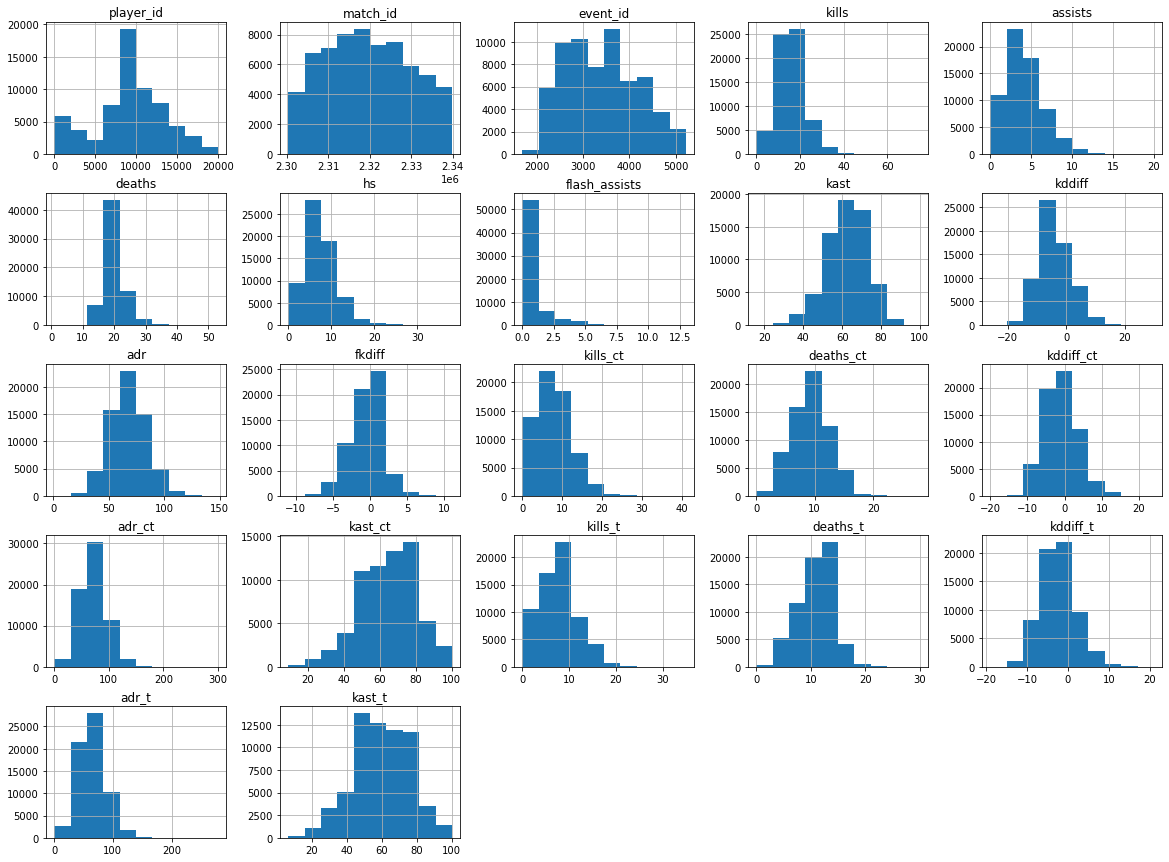

In [16]:
# Histogram for individual loss features.
_ = df_individual_loss.hist(bins = 10, figsize = (20,15))

Now we want to look closer at some of the categorical features in our data. We'll look at 'country' and 'map'. We are not interested in 'date', 'player_name', 'team', 'opponent', 'event_name', or 'match_outcome'. **Note:** While 'team' and 'opponent' likely impact the outcome of a match, we are not interested in how strength level of teams/opponents impact match outcomes, but rather just the match statistics.

<AxesSubplot:title={'center':'Country of Origin for Players that Lost Match'}, xlabel='country', ylabel='count'>

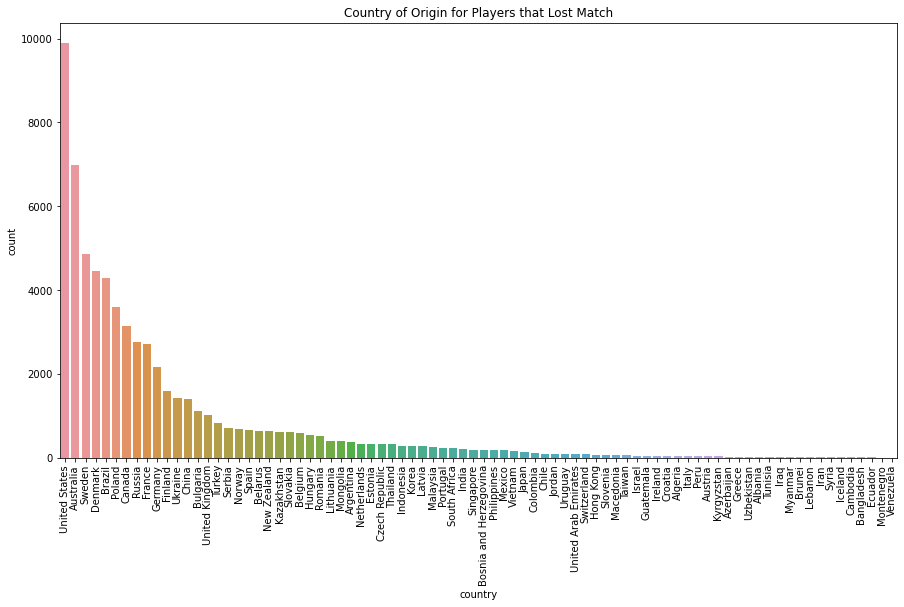

In [17]:
# Create a copy of the individual loss dataframe only containing the categorical features.
df_individual_loss_cat = df_individual_loss.select_dtypes(include = 'object').copy()

# Countplot for the 'country' feature.
fig, ax = plt.subplots(figsize = (15,8))
plt.xticks(rotation = 90)
plt.title('Country of Origin for Players that Lost Match')
sns.countplot(data = df_individual_loss_cat, x = 'country', order = df_individual_loss_cat['country'].value_counts().index)

<AxesSubplot:xlabel='map', ylabel='count'>

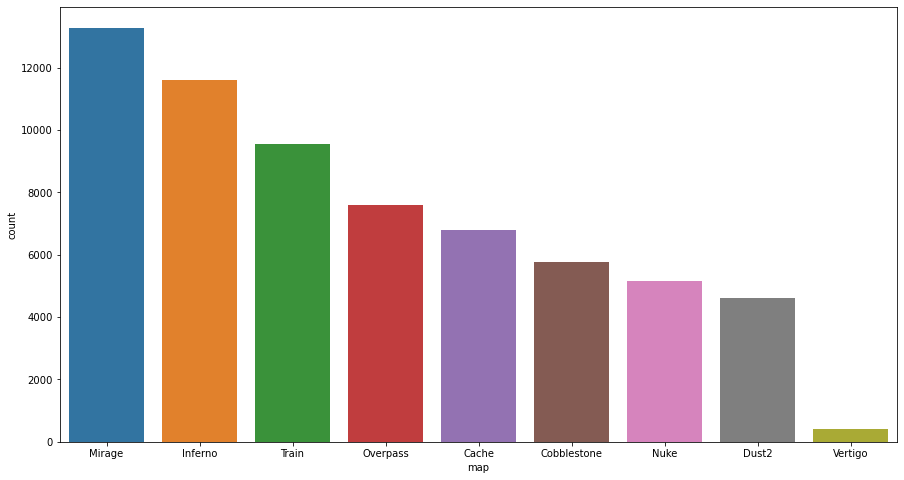

In [18]:
# Countplot for the 'map' feature.
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(data = df_individual_loss_cat, x = 'map', order = df_individual_loss_cat['map'].value_counts().index)

<AxesSubplot:>

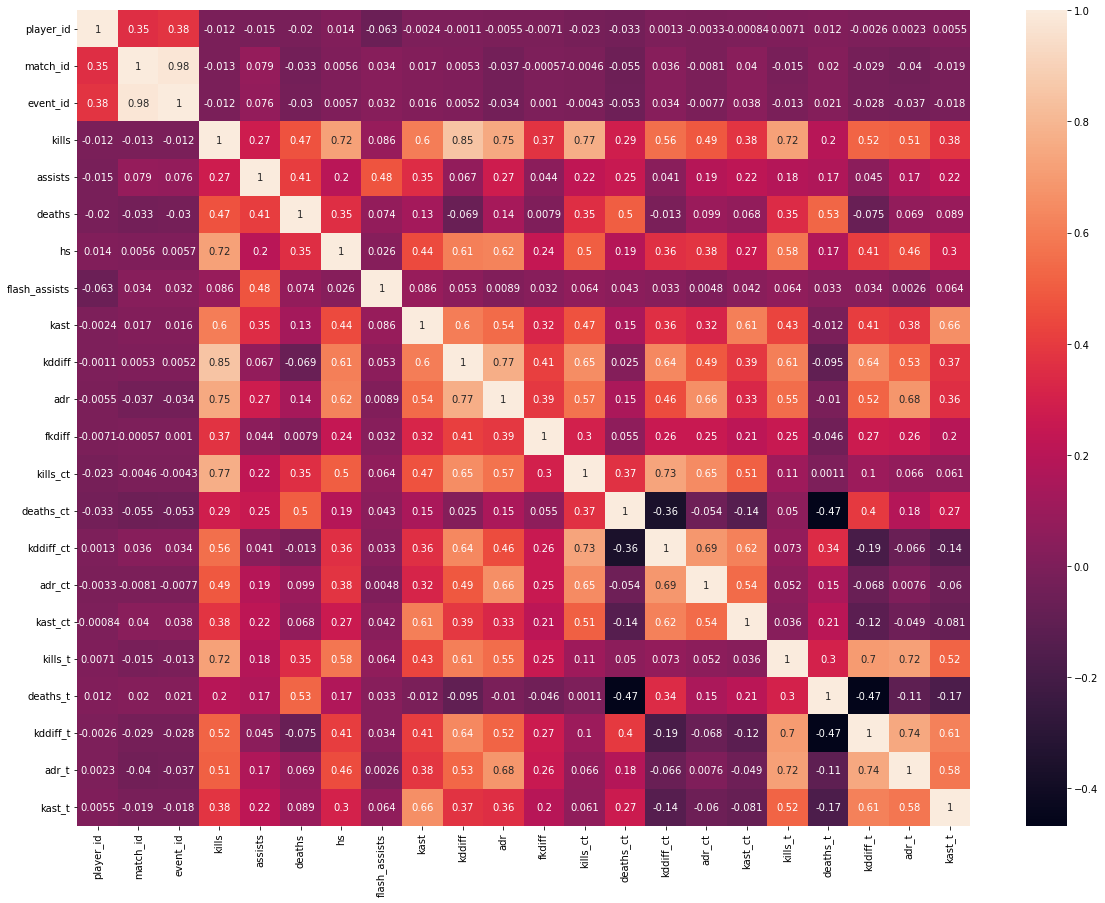

In [19]:
# Correlation heatmap
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_individual_loss.corr(), annot = True)

It is worth noting that many of these features that have high correlation with other features are expected due to how they are calculated. For example, we would expect 'kills' and 'kills_ct' to be highly correlated (0.77) since the 'kills' feature is simply 'kills_t' + 'kills_ct'.

### Individual Player Performance - Boxplot/Countplot/Scatterplot Comparisons

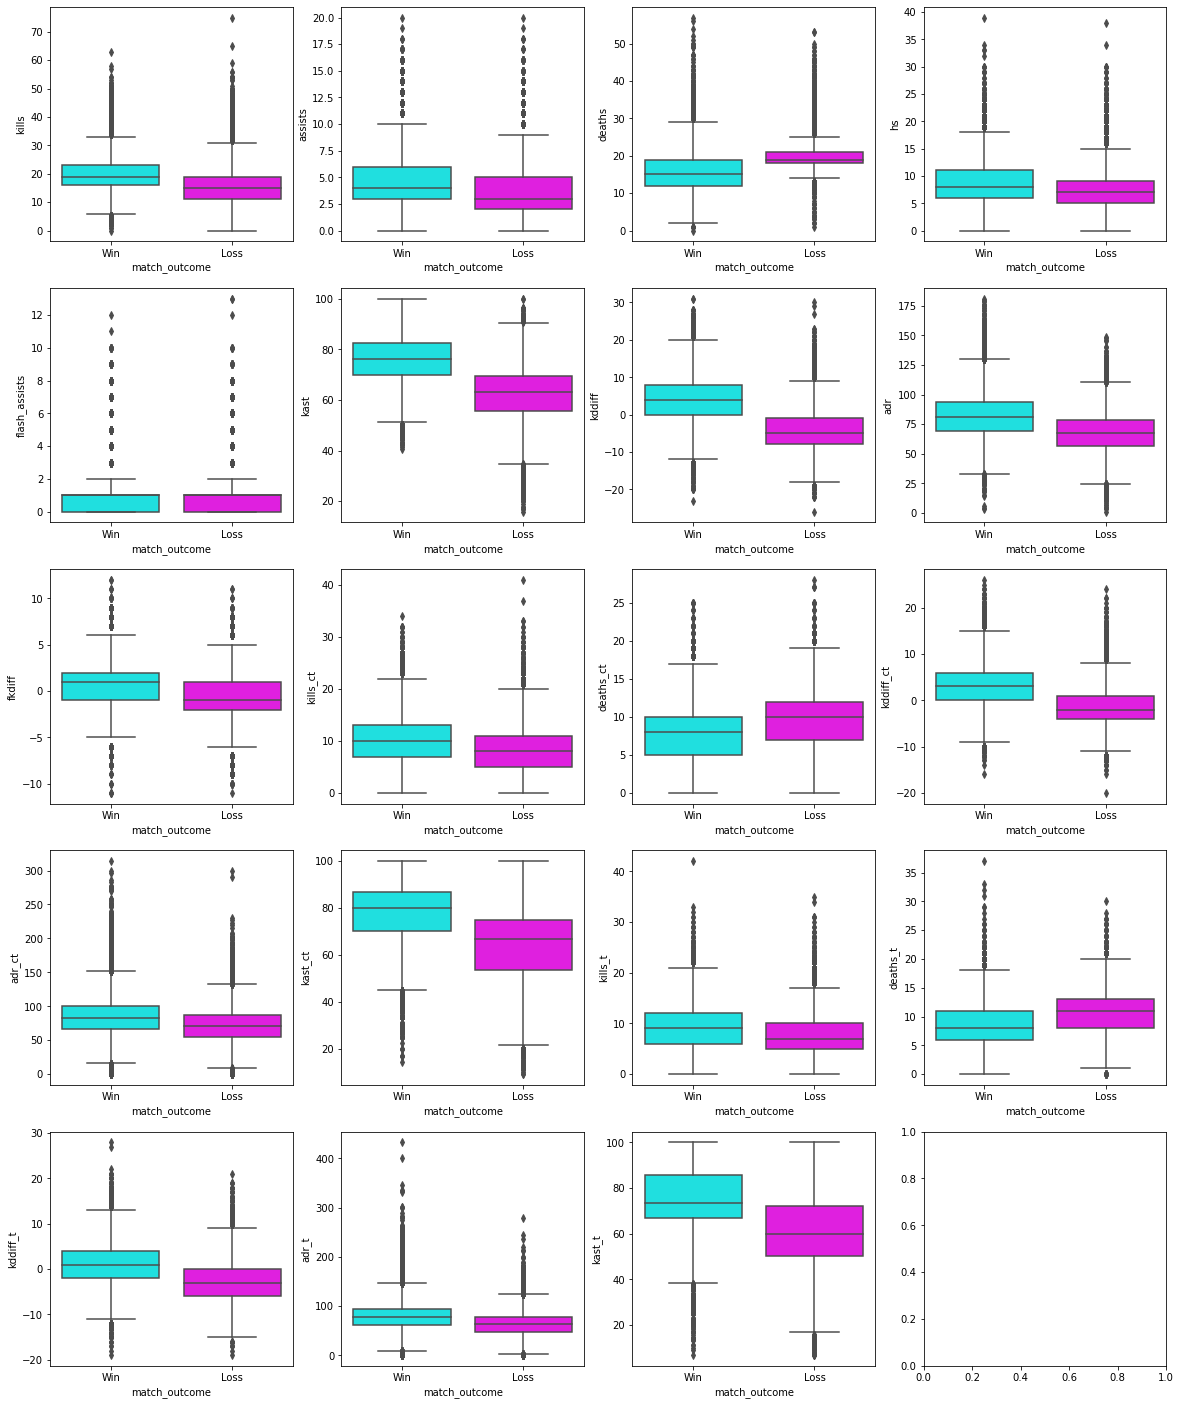

In [20]:
# Side-by-side boxplots by 'match_outcome' (numerical feature comparisons).
fig, ax = plt.subplots(5, 4, figsize = (20,25))

colors = ['cyan', 'magenta']
_ = sns.boxplot(ax = ax[0,0], x = 'match_outcome', y = 'kills', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[0,1], x = 'match_outcome', y = 'assists', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[0,2], x = 'match_outcome', y = 'deaths', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[0,3], x = 'match_outcome', y = 'hs', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[1,0], x = 'match_outcome', y = 'flash_assists', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[1,1], x = 'match_outcome', y = 'kast', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[1,2], x = 'match_outcome', y = 'kddiff', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[1,3], x = 'match_outcome', y = 'adr', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[2,0], x = 'match_outcome', y = 'fkdiff', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[2,1], x = 'match_outcome', y = 'kills_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[2,2], x = 'match_outcome', y = 'deaths_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[2,3], x = 'match_outcome', y = 'kddiff_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[3,0], x = 'match_outcome', y = 'adr_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[3,1], x = 'match_outcome', y = 'kast_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[3,2], x = 'match_outcome', y = 'kills_t', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[3,3], x = 'match_outcome', y = 'deaths_t', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[4,0], x = 'match_outcome', y = 'kddiff_t', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[4,1], x = 'match_outcome', y = 'adr_t', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[4,2], x = 'match_outcome', y = 'kast_t', data = df_individual, palette = colors)

The deaths boxplot shows that the individual players who lost matches vary less in amount of deaths than that of who won matches.

We can also see that in the flash_assists boxplot, the distributions look quite similar for both the win and loss data. This implies that it might not be that useful in predicting match outcomes.

Looking at the kast and kddiff boxplots, we see that 1st quartile of the win data is roughly equal to the 3rd quartile of the loss data. This is important to mention as 75% of the win data is above 75% of the loss data, suggesting that there is a difference in the two datasets.

Most of the other plots show roughly what we would expect in terms of how the win data should differ from the loss data. All outliers in the boxplots appear to be feasible abnormal events. This should be somewhat expected which as much data as we have.

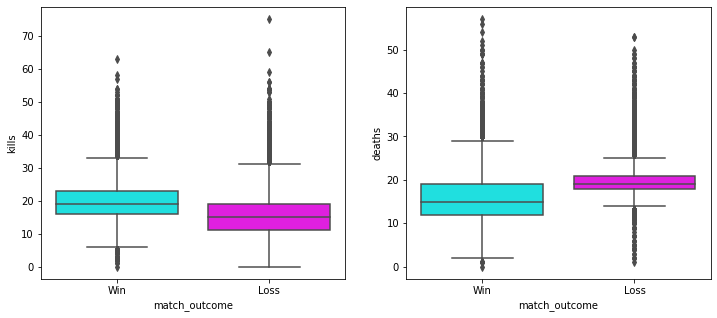

In [21]:
# Report Plot (post-modeling) simply zooming in on select plots above
fig, ax = plt.subplots(1, 2, figsize = (12,5))
_ = sns.boxplot(ax = ax[0], x = 'match_outcome', y = 'kills', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[1], x = 'match_outcome', y = 'deaths', data = df_individual, palette = colors)

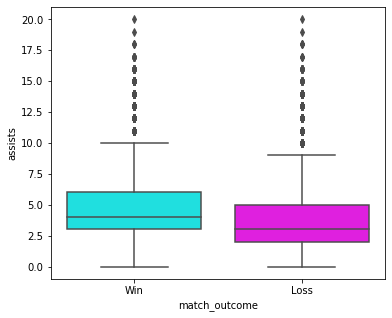

In [22]:
# Report Plot (post-modeling) simply zooming in on select plots above
fig, ax = plt.subplots(figsize = (6,5))
_ = sns.boxplot(x = 'match_outcome', y = 'assists', data = df_individual, palette = colors)

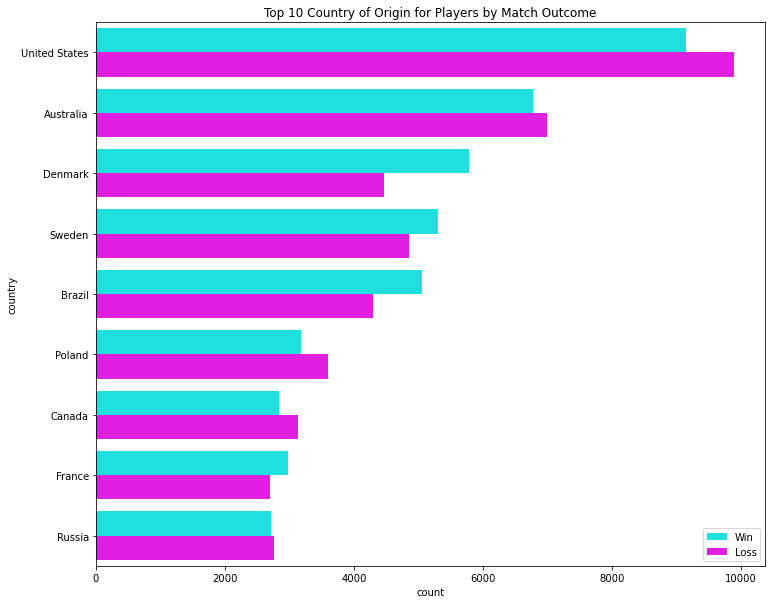

In [23]:
# Side-by-side countplots by 'match_outcome' (categorical feature comparisons).
fig, ax = plt.subplots(figsize = (12,10))

colors = ['cyan', 'magenta']

sns.countplot(y = 'country', hue = 'match_outcome', data = df_individual, order = df_individual['country'].value_counts().iloc[:9].index, palette = colors, orient = 'h').set(title='Top 10 Country of Origin for Players by Match Outcome')
ax.legend(loc = 'lower right')

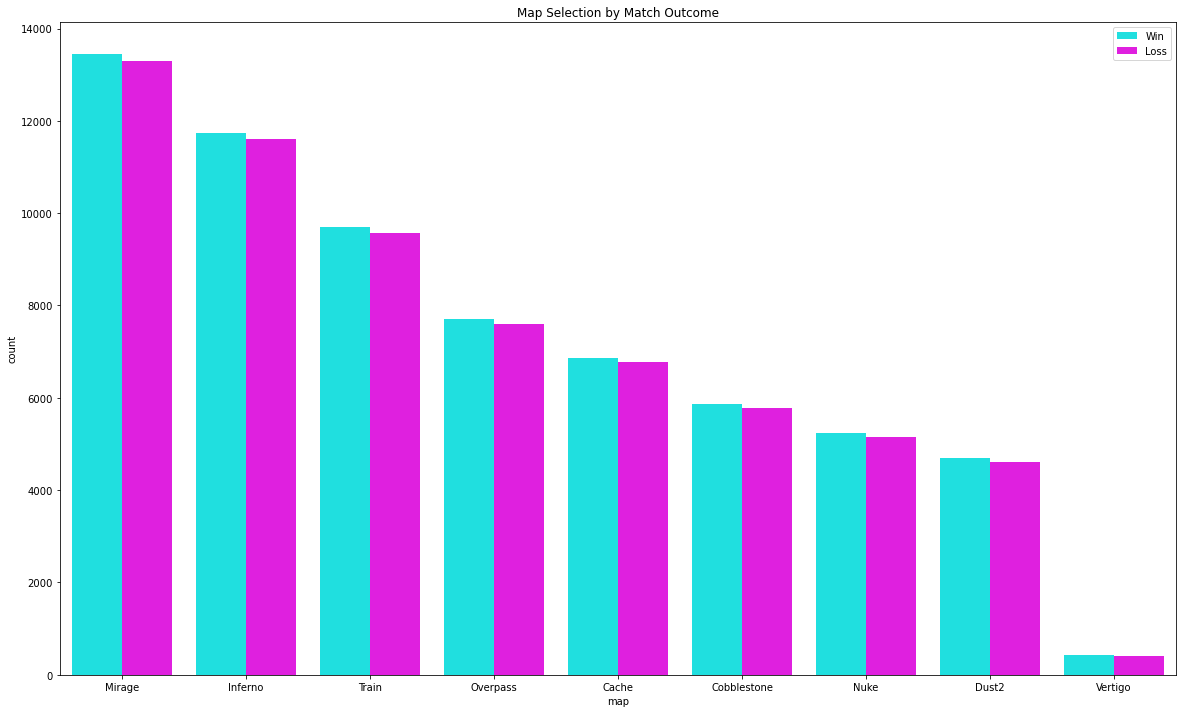

In [24]:
# Side-by-side countplots by 'match_outcome' (categorical feature comparisons).
fig, ax = plt.subplots(figsize = (20,12))
sns.countplot(x = 'map', hue = 'match_outcome', data = df_individual, order = df_individual['map'].value_counts().index, palette = colors).set(title='Map Selection by Match Outcome')
ax.legend(loc = 'upper right')

The first countplot shows that the majority of players in our data are from the United States, and the largest difference in matches won and lost, grouped by the country a player is from, seems to be for players from Denmark (more wins then losses).

We would expect the second countplot to show equal map counts for the win and loss data, so we should make a note that there is an unexpected/unexplained difference in map counts.

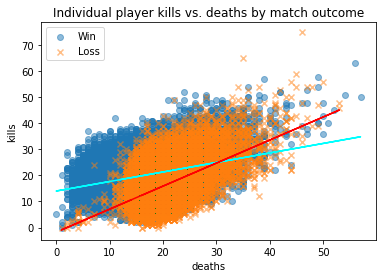

In [25]:
# Create scatterplots to take a closer look at some relationships b/w features.
_ = plt.scatter(x = df_individual_win.deaths, y = df_individual_win.kills, marker = 'o', alpha = 0.5)
_ = plt.scatter(x = df_individual_loss.deaths, y = df_individual_loss.kills, marker = 'x', alpha = 0.5)
_ = plt.xlabel('deaths')
_ = plt.ylabel('kills')
_ = plt.title('Individual player kills vs. deaths by match outcome')
_ = plt.legend(['Win', 'Loss'], loc = 'upper left')
a, b = np.polyfit(df_individual_win.deaths, df_individual_win.kills, 1)
_ = plt.plot(df_individual_win.deaths, a*df_individual_win.deaths+b, color = 'cyan')
a2, b2 = np.polyfit(df_individual_loss.deaths, df_individual_loss.kills, 1)
_ = plt.plot(df_individual_loss.deaths, a2*df_individual_loss.deaths+b2, color = 'red')

The plot above shows that for both win and loss data, as kills increase, so do deaths. This makes sense because more deaths translates to more rounds being played, and therefore more opportunities for kills to be made. The relationship tends to be stronger for the loss data (r=0.47) and the number of deaths increases at a faster rate.

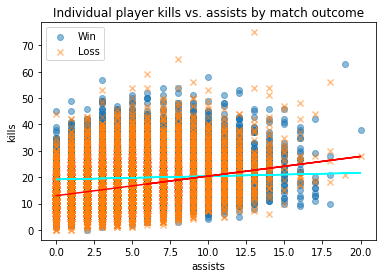

In [26]:
# Create scatterplots to take a closer look at some relationships b/w features.
_ = plt.scatter(x = df_individual_win.assists, y = df_individual_win.kills, marker = 'o', alpha = 0.5)
_ = plt.scatter(x = df_individual_loss.assists, y = df_individual_loss.kills, marker = 'x', alpha = 0.5)
_ = plt.xlabel('assists')
_ = plt.ylabel('kills')
_ = plt.title('Individual player kills vs. assists by match outcome')
_ = plt.legend(['Win', 'Loss'], loc = 'upper left')
a, b = np.polyfit(df_individual_win.assists, df_individual_win.kills, 1)
_ = plt.plot(df_individual_win.assists, a*df_individual_win.assists+b, color = 'cyan')
a2, b2 = np.polyfit(df_individual_loss.assists, df_individual_loss.kills, 1)
_ = plt.plot(df_individual_loss.assists, a2*df_individual_loss.assists+b2, color = 'red')

There doesn't appear to be a major difference in the correlation between kills and assists for the win and loss data.

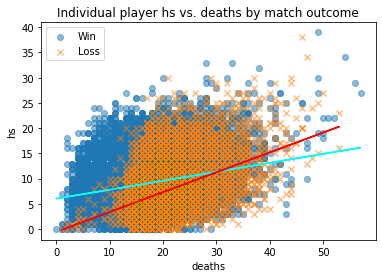

In [27]:
# Create scatterplots to take a closer look at some relationships b/w features.
_ = plt.scatter(x = df_individual_win.deaths, y = df_individual_win.hs, marker = 'o', alpha = 0.5)
_ = plt.scatter(x = df_individual_loss.deaths, y = df_individual_loss.hs, marker = 'x', alpha = 0.5)
_ = plt.xlabel('deaths')
_ = plt.ylabel('hs')
_ = plt.title('Individual player hs vs. deaths by match outcome')
_ = plt.legend(['Win', 'Loss'], loc = 'upper left')
a, b = np.polyfit(df_individual_win.deaths, df_individual_win.hs, 1)
_ = plt.plot(df_individual_win.deaths, a*df_individual_win.deaths+b, color = 'cyan')
a2, b2 = np.polyfit(df_individual_loss.deaths, df_individual_loss.hs, 1)
_ = plt.plot(df_individual_loss.deaths, a2*df_individual_loss.deaths+b2, color = 'red')

We can see from the heatmaps earlier that amount of headshots is more highly correlated with the loss data (r=0.35), but still not very correlated. In both cases, with more deaths comes more headshots, but this is most likely due to the fact that if a game goes on longer, more opportunities for headshots will occur. We could consider making a new variable for headshot percentage to maybe get a better understanding of how the proportion increases or decreases regardless of length of match.

In [28]:
# Test if kills are useful in predicting match outcomes by performing a hypothesis test comparing win/loss.
# Both kill distributions for the indivudal data are roughly normal, so we will use a 2-sample t-test.
# Check variances to set options in t-test.
print('Variances ', np.var(df_individual_win.kills), np.var(df_individual_loss.kills))
print('Means: ', df_individual_win.kills.mean(), df_individual_loss.kills.mean())

Variances  31.32926082238816 39.388540609089986
Means:  19.72220869353464 15.70926320338303


We will use the rule of thumb that since the ratio of variances in smaller than 4, the equal_var parameter will be set to true in the t-test.

In [29]:
ttest_ind(df_individual_win.kills, df_individual_loss.kills, equal_var=True)

Ttest_indResult(statistic=121.93954333635064, pvalue=0.0)

The result of the t-test means that we can reject the null hypothesis and that we have evidence that the average amount of kills for the win data is significantly different than that for the loss data. This means that it will most likely be useful in predicting match outcomes.

### Individual Player Performance - Combined Win/Loss Data

In [30]:
# Summary statistics (wins and losses combined).
df_individual.describe().T

,count,mean,std,min,25%,50%,75%,max
player_id,130498.0,9.033049e+03,4176.695178,2.0,7433.0,9083.0,11630.00,19995.0
match_id,130498.0,2.319657e+06,10327.438852,2300412.0,2311279.0,2319488.0,2327782.75,2339828.0
event_id,130498.0,3.415106e+03,779.491686,1690.0,2767.0,3374.0,3965.00,5224.0
kills,130498.0,1.772973e+01,6.273503,0.0,13.0,17.0,22.00,75.0
assists,130498.0,4.133879e+00,2.443805,0.0,2.0,4.0,6.00,20.0
deaths,130498.0,1.769079e+01,4.818131,0.0,15.0,18.0,20.00,57.0
hs,130498.0,8.027947e+00,3.867848,0.0,5.0,8.0,10.00,39.0
flash_assists,130498.0,1.013510e+00,1.124356,0.0,0.0,1.0,1.00,13.0
kast,130498.0,6.939646e+01,12.119714,15.8,61.8,70.0,77.80,100.0
kddiff,130498.0,3.893546e-02,7.172511,-26.0,-5.0,0.0,5.00,31.0


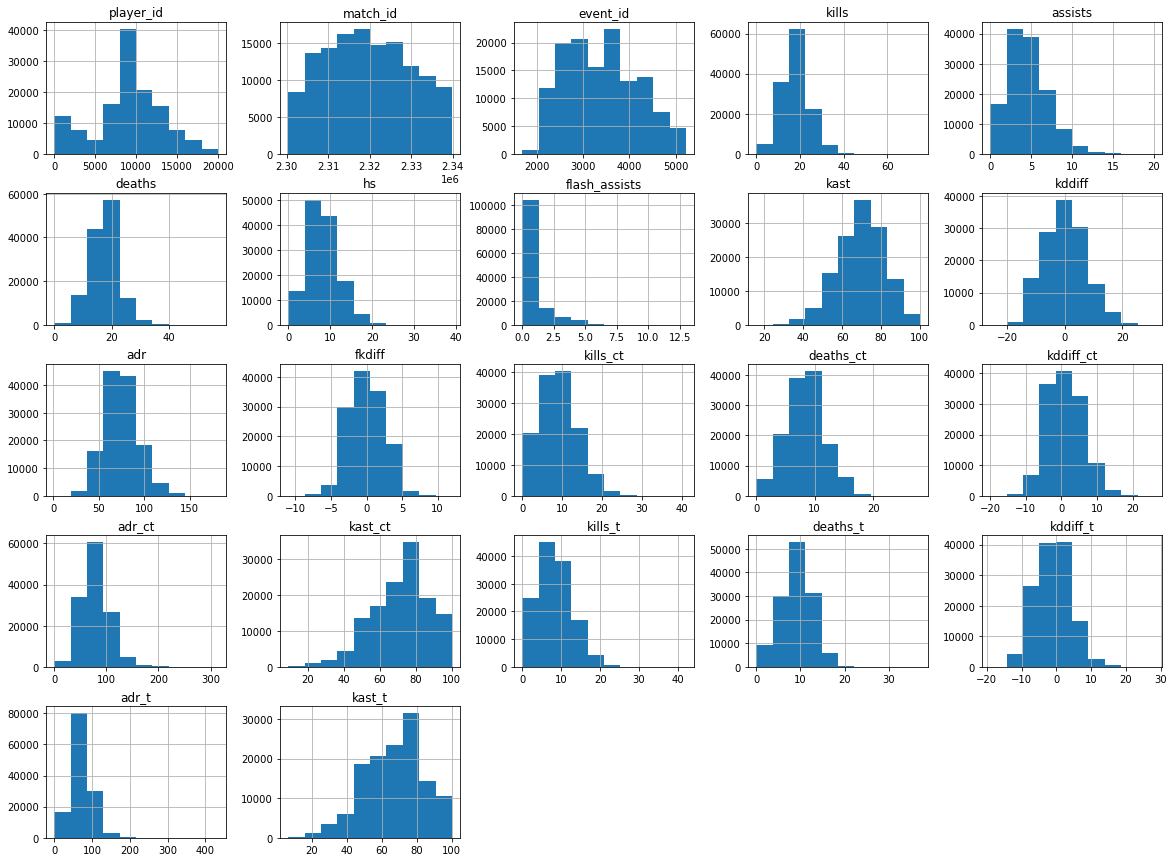

In [31]:
# Histogram for individual features (wins and losses combined).
_ = df_individual.hist(bins = 10, figsize = (20,15))

<AxesSubplot:>

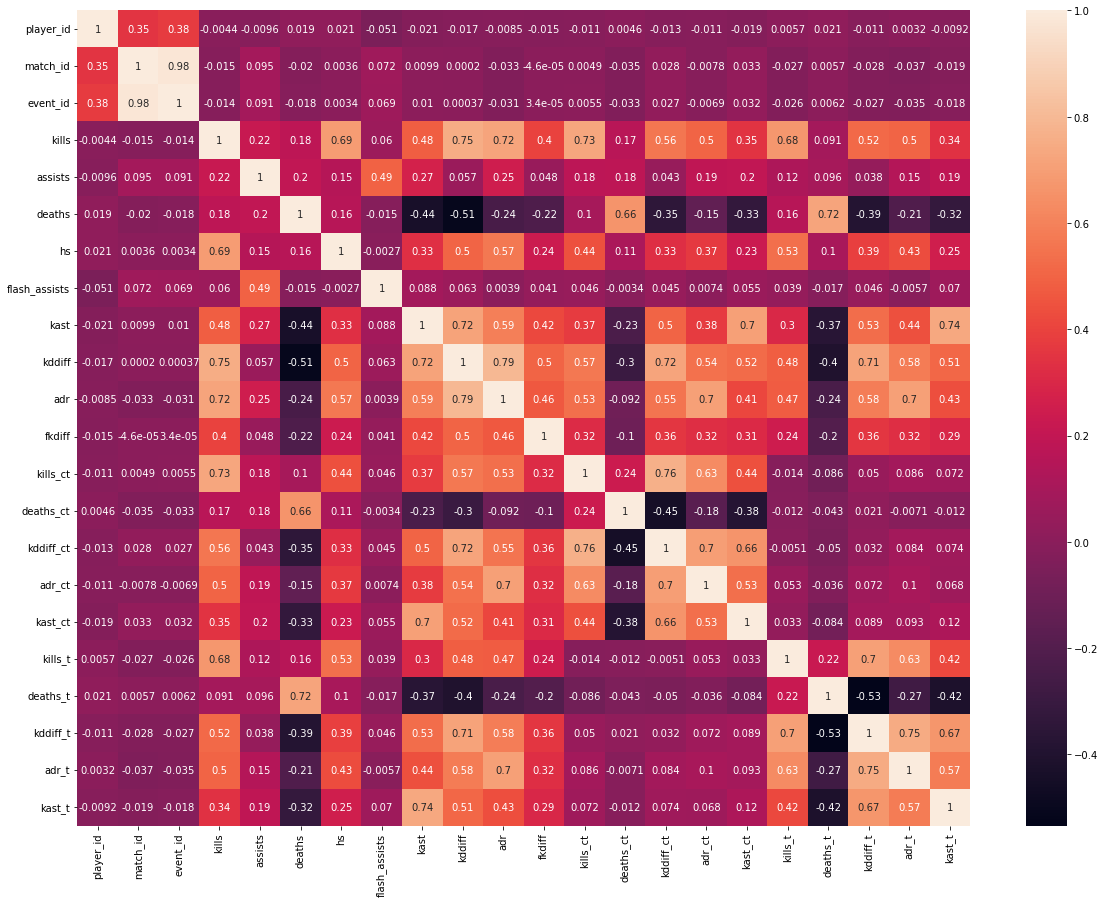

In [32]:
# Correlation heatmap (wins and losses combined).
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_individual.corr(), annot = True)

## Taking a Closer Look at the Team Data

### Team Performance - Win

In [33]:
# Summary statistics for team win features.
df_team_win.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,13162.0,2.319657e+06,10326.940372,2300412.00,2311275.750,2319488.50,2327782.75,2339828.00
kills,13162.0,1.972484e+01,2.898948,3.80,18.000,19.40,20.60,49.80
assists,13162.0,4.602069e+00,1.317564,0.50,3.600,4.40,5.40,12.00
deaths,13162.0,1.561125e+01,4.731966,1.80,12.200,15.40,18.40,54.00
hs,13162.0,8.806230e+00,1.683602,0.60,7.800,8.60,9.80,26.80
flash_assists,13162.0,1.125829e+00,0.617580,0.00,0.800,1.00,1.40,5.00
kast,13162.0,7.648634e+01,6.203123,54.66,72.020,75.90,80.76,98.76
kddiff,13162.0,4.113586e+00,2.730343,-7.40,2.200,4.00,6.00,20.00
adr,13162.0,8.188797e+01,6.338964,57.94,77.345,81.16,86.02,118.90
fkdiff,13162.0,7.047359e-01,0.998495,-3.60,0.000,0.80,1.40,5.00


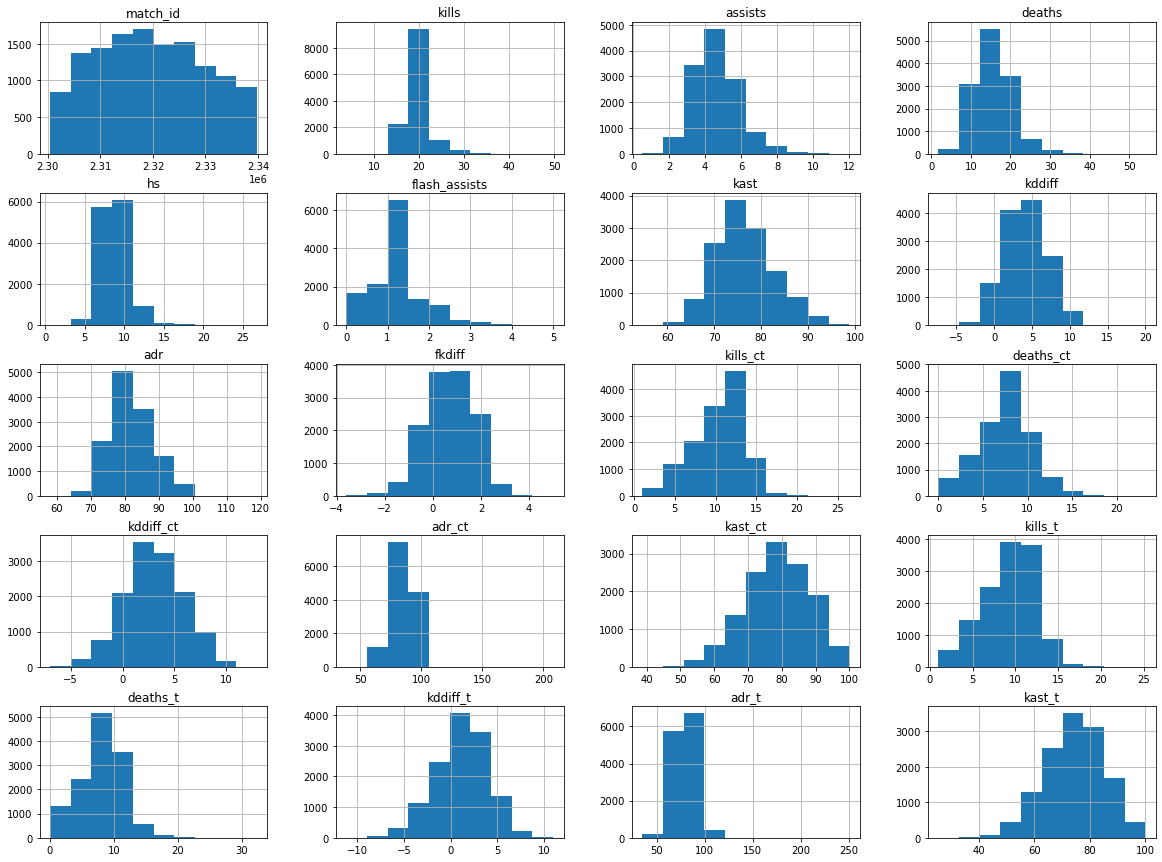

In [34]:
# Histogram for team win features.
_ = df_team_win.hist(bins = 10, figsize = (20,15))

Now we want to look closer at some of the categorical features in our data. We'll look at 'map'. We are not interested in 'date', 'team', 'opponent', 'event_name', or 'match_outcome'. **Note:** While 'team' and 'opponent' likely impact the outcome of a match, we are not interested in how strength level of teams/opponents impact match outcomes, but rather just the match statistics.

<AxesSubplot:xlabel='map', ylabel='count'>

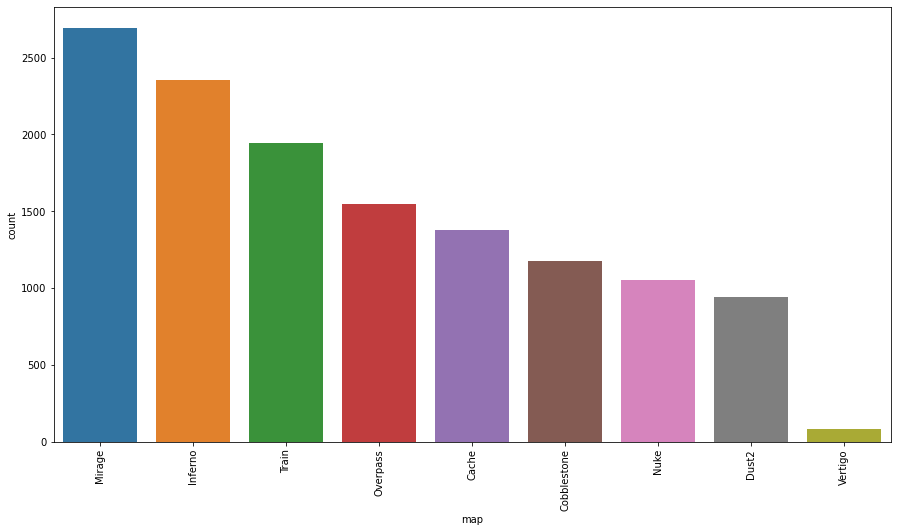

In [35]:
# Create a copy of the team win dataframe only containing the categorical features.
df_team_win_cat = df_team_win.select_dtypes(include = 'object').copy()

# Countplot for the 'map' feature.
fig, ax = plt.subplots(figsize = (15,8))
plt.xticks(rotation = 90)
sns.countplot(data = df_team_win_cat, x = 'map', order = df_team_win_cat['map'].value_counts().index)

<AxesSubplot:>

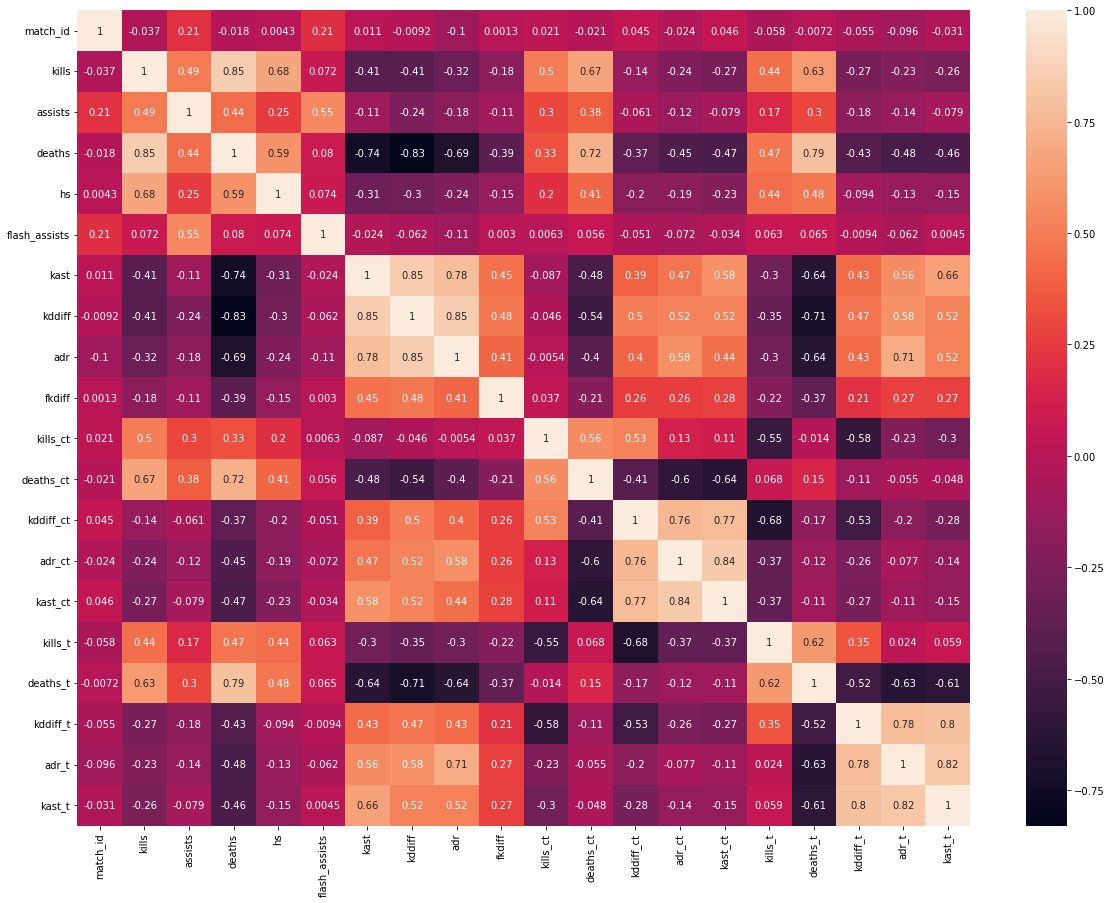

In [36]:
# Correlation heatmap
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_team_win.corr(), annot = True)

### Team Performance - Loss

In [37]:
# Summary statistics for team loss features.
df_team_loss.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,13157.0,2.319659e+06,10327.426398,2.300412e+06,2311278.00,2319492.00,2327784.00,2339828.0
kills,13157.0,1.561606e+01,4.707275,2.000000e+00,12.20,15.40,18.40,54.0
assists,13157.0,3.633620e+00,1.449698,0.000000e+00,2.60,3.40,4.40,13.4
deaths,13157.0,1.974674e+01,2.898872,3.666667e+00,18.00,19.40,20.80,49.8
hs,13157.0,7.204023e+00,2.184434,1.000000e+00,5.75,7.00,8.40,23.2
flash_assists,13157.0,8.950369e-01,0.556811,0.000000e+00,0.60,1.00,1.00,5.8
kast,13157.0,6.206795e+01,7.235601,2.940000e+01,57.68,63.00,67.24,85.2
kddiff,13157.0,-4.130676e+00,2.703539,-1.400000e+01,-6.00,-4.00,-2.20,13.0
adr,13157.0,6.760607e+01,6.666040,1.765000e+01,63.76,68.50,72.24,107.3
fkdiff,13157.0,-7.023296e-01,1.004034,-4.500000e+00,-1.40,-0.80,0.00,3.6


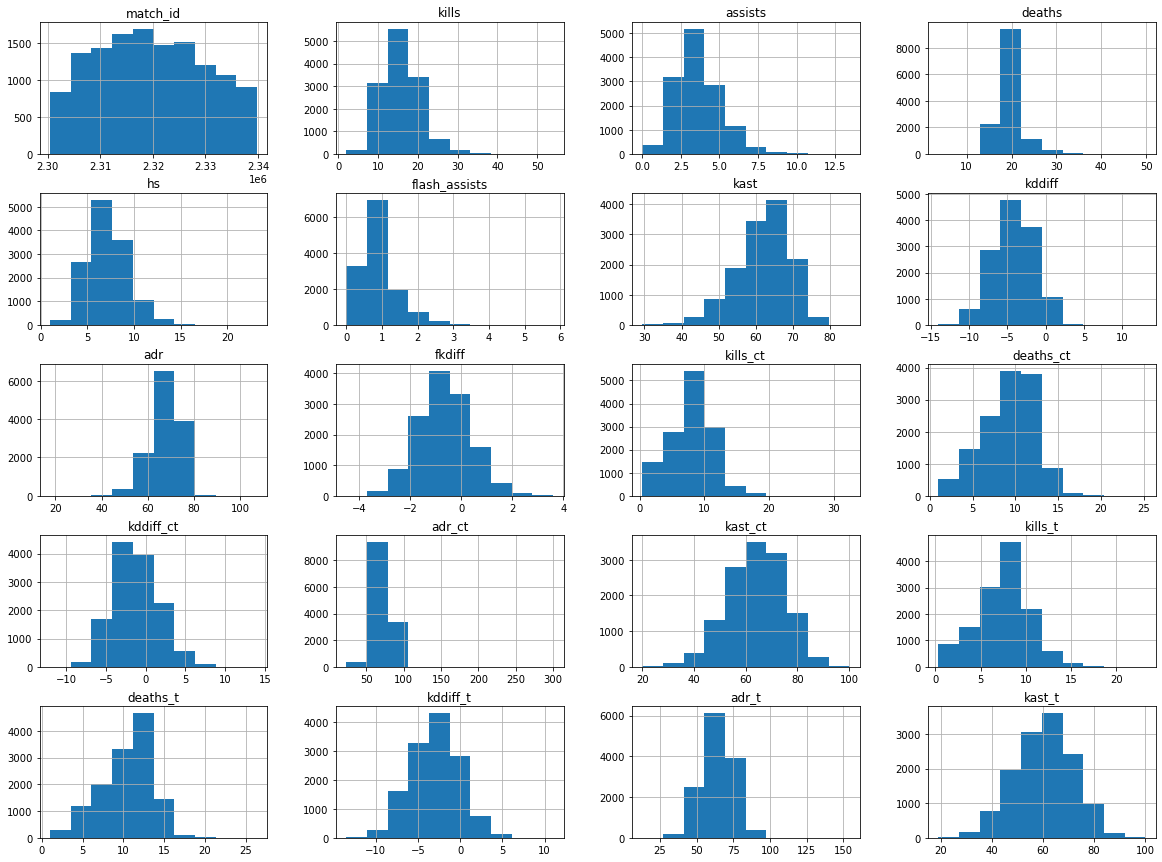

In [38]:
# Histogram for team loss features.
_ = df_team_loss.hist(bins = 10, figsize = (20,15))

Now we want to look closer at some of the categorical features in our data. We'll look at 'map'. We are not interested in 'date', 'team', 'opponent', 'event_name', or 'match_outcome'. **Note:** While 'team' and 'opponent' likely impact the outcome of a match, we are not interested in how strength level of teams/opponents impact match outcomes, but rather just the match statistics.

<AxesSubplot:xlabel='map', ylabel='count'>

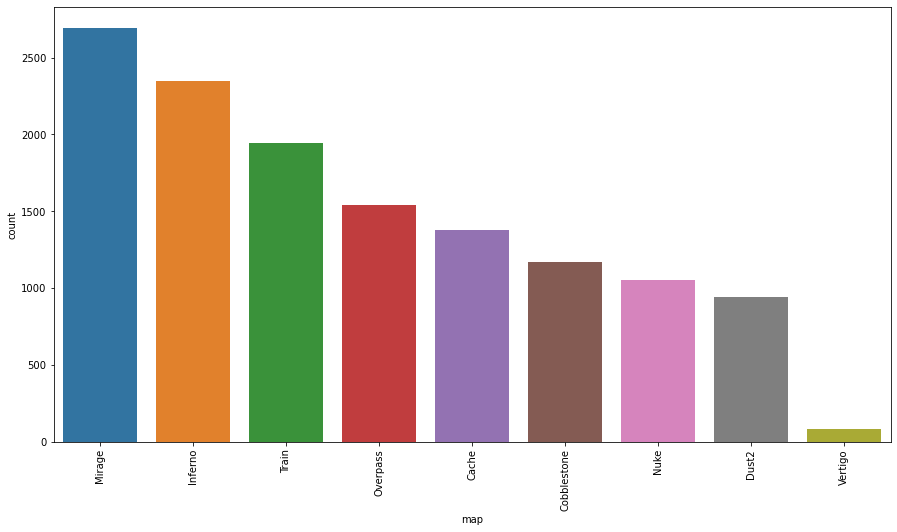

In [39]:
# Create a copy of the team loss dataframe only containing the categorical features.
df_team_loss_cat = df_team_loss.select_dtypes(include = 'object').copy()

# Countplot for the 'map' feature.
fig, ax = plt.subplots(figsize = (15,8))
plt.xticks(rotation = 90)
sns.countplot(data = df_team_loss_cat, x = 'map', order = df_team_loss_cat['map'].value_counts().index)

<AxesSubplot:>

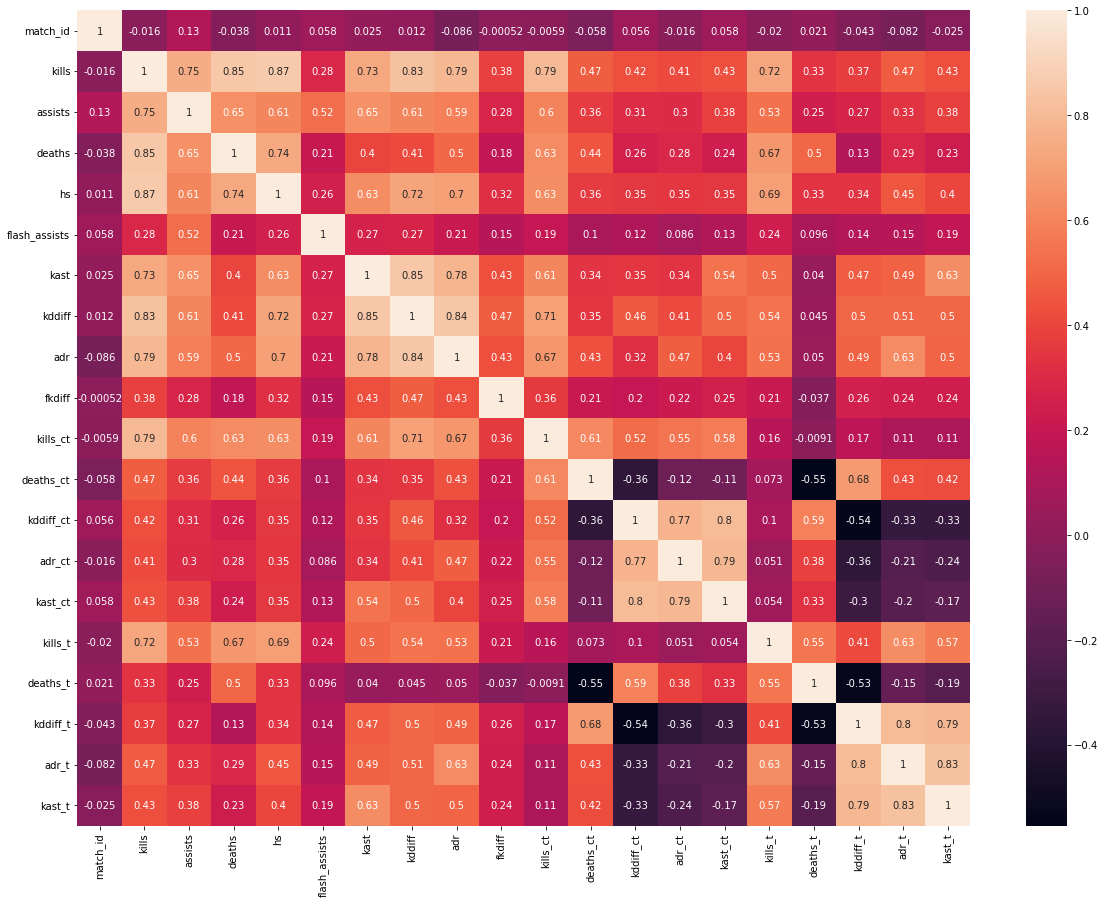

In [40]:
# Correlation heatmap
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_team_loss.corr(), annot = True)

### Team Performance - Boxplot/Countplot/Scatterplot Comparisons

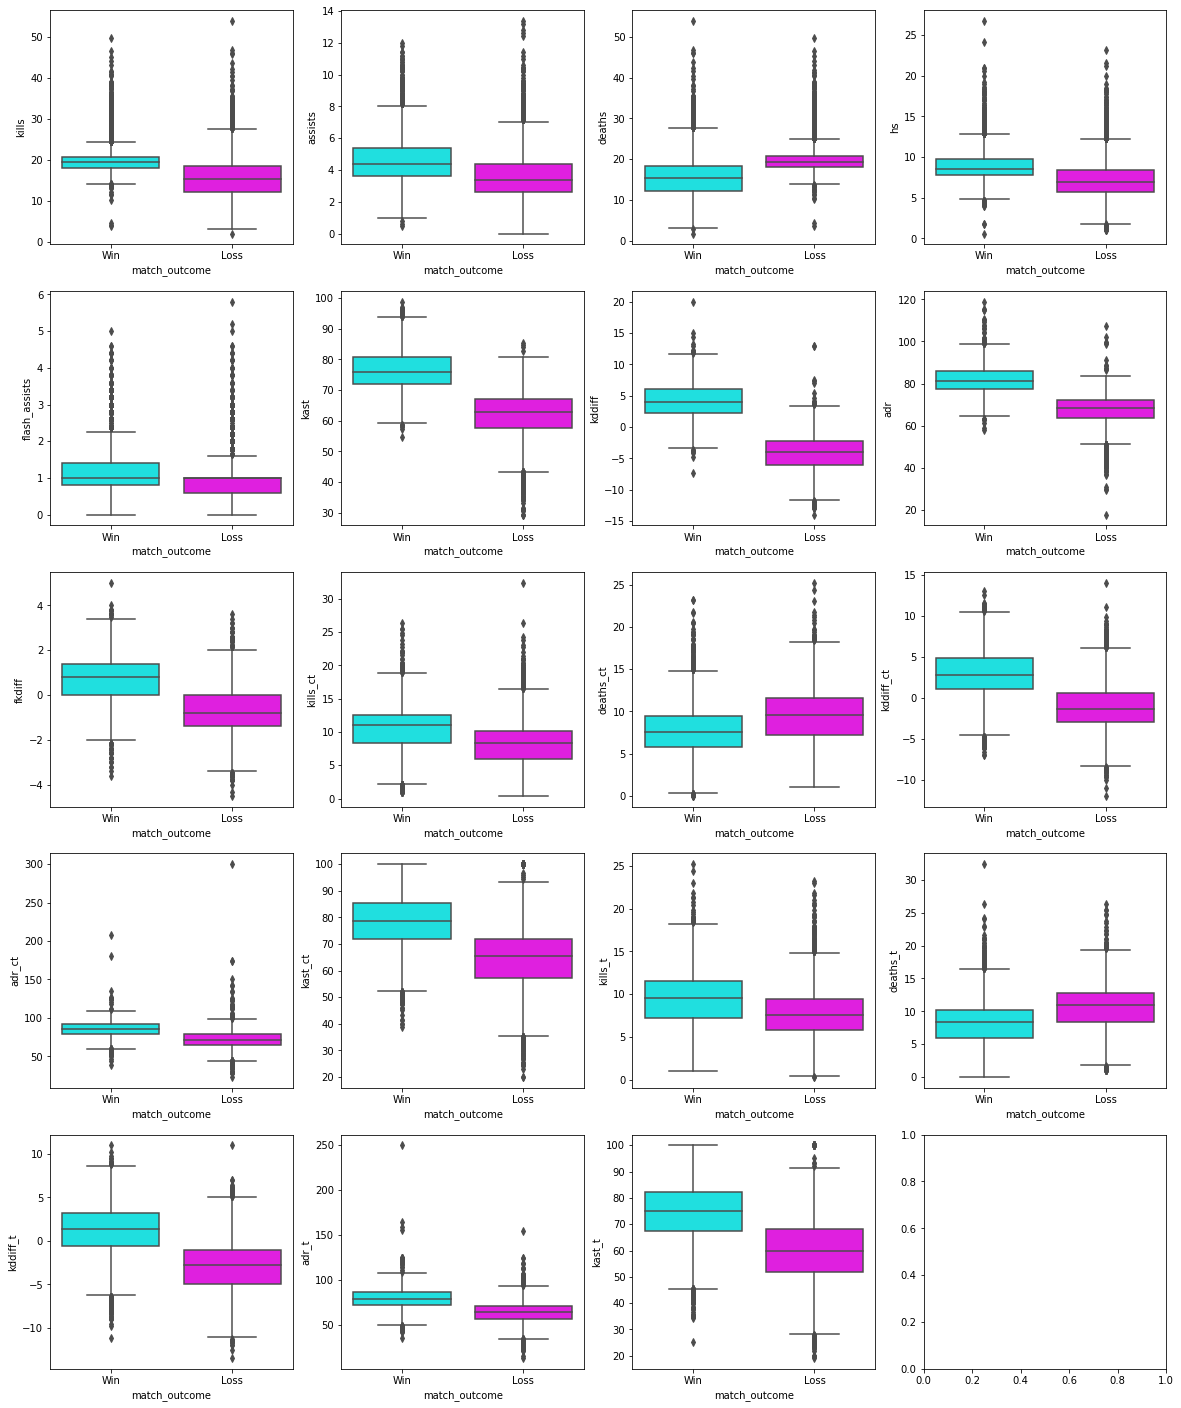

In [41]:
# Side-by-side boxplots by 'match_outcome' (numerical feature comparisons).
fig, ax = plt.subplots(5, 4, figsize = (20,25))

colors = ['cyan', 'magenta']
_ = sns.boxplot(ax = ax[0,0], x = 'match_outcome', y = 'kills', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[0,1], x = 'match_outcome', y = 'assists', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[0,2], x = 'match_outcome', y = 'deaths', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[0,3], x = 'match_outcome', y = 'hs', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[1,0], x = 'match_outcome', y = 'flash_assists', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[1,1], x = 'match_outcome', y = 'kast', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[1,2], x = 'match_outcome', y = 'kddiff', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[1,3], x = 'match_outcome', y = 'adr', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[2,0], x = 'match_outcome', y = 'fkdiff', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[2,1], x = 'match_outcome', y = 'kills_ct', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[2,2], x = 'match_outcome', y = 'deaths_ct', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[2,3], x = 'match_outcome', y = 'kddiff_ct', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[3,0], x = 'match_outcome', y = 'adr_ct', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[3,1], x = 'match_outcome', y = 'kast_ct', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[3,2], x = 'match_outcome', y = 'kills_t', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[3,3], x = 'match_outcome', y = 'deaths_t', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[4,0], x = 'match_outcome', y = 'kddiff_t', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[4,1], x = 'match_outcome', y = 'adr_t', data = df_team, palette = colors, order=['Win', 'Loss'])
_ = sns.boxplot(ax = ax[4,2], x = 'match_outcome', y = 'kast_t', data = df_team, palette = colors, order=['Win', 'Loss'])

Here we see similar results as before, with both kast and kddiff having different distributions for win and loss data. Additionaly, however, we see that there is a larger difference then before for the adr and fkdiff features, as well as for kast_ct, kast_t, fkdiff_ct, fkdiff_t, adr_ct, and adr_t. This means that when we build our models we may expect our aggregated team performance model to outperform the individual player performance model.

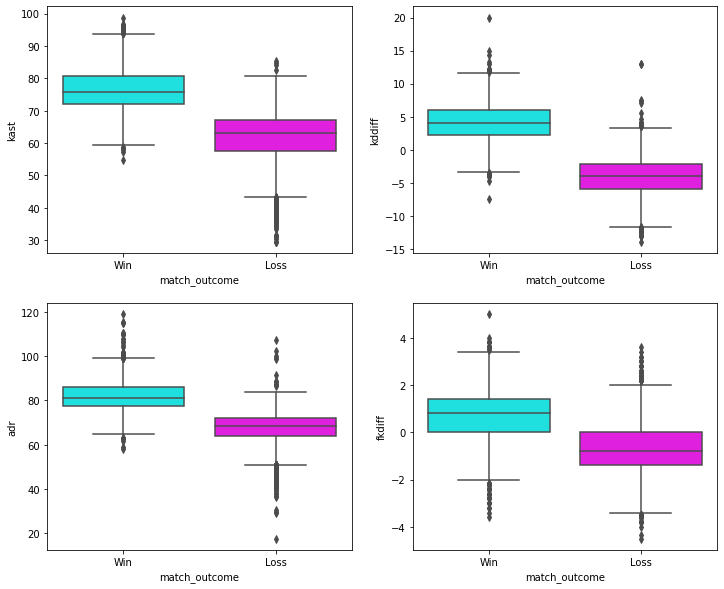

In [42]:
# Report Plot (post-modeling) simply zooming in on select plots above
fig, ax = plt.subplots(2, 2, figsize = (12,10))
_ = sns.boxplot(ax = ax[0,0], x = 'match_outcome', y = 'kast', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[0,1], x = 'match_outcome', y = 'kddiff', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[1,0], x = 'match_outcome', y = 'adr', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[1,1], x = 'match_outcome', y = 'fkdiff', data = df_team, palette = colors)

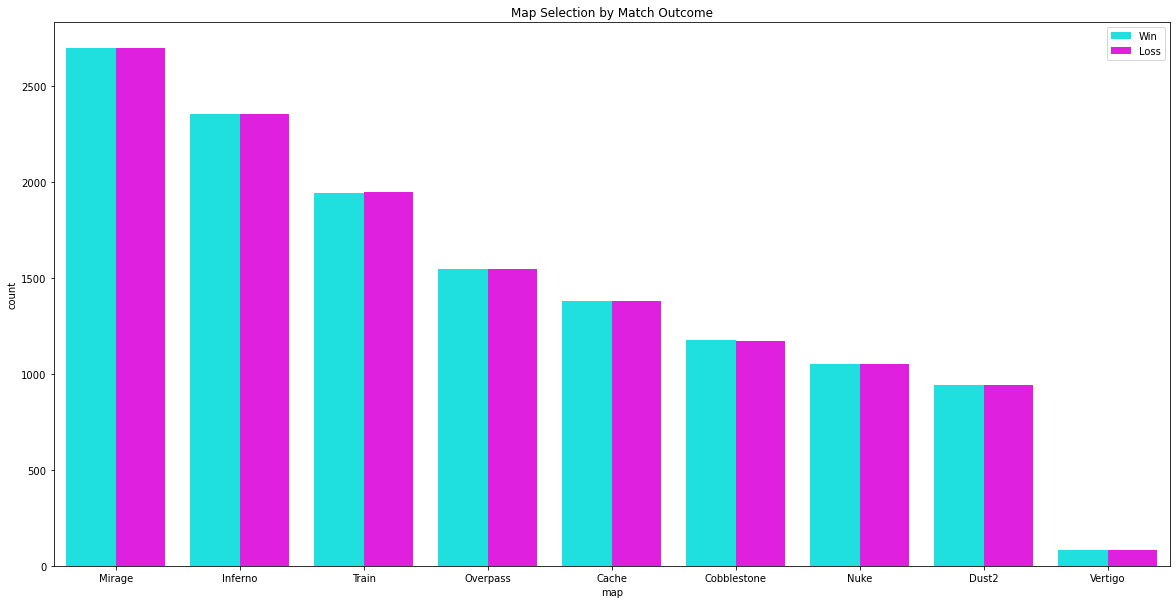

In [43]:
# Side-by-side countplots by 'match_outcome' (categorical feature comparisons).
fig, ax = plt.subplots(figsize = (20,10))

colors = ['cyan', 'magenta']

sns.countplot(x = 'map', hue = 'match_outcome', data = df_team, order = df_team['map'].value_counts().index, palette = colors).set(title='Map Selection by Match Outcome')
plt.legend(loc = 'upper right')

The countplot is what we expect: The map counts for the win data are the same as the loss data. Since during the data wrangling stage we aggregated over the teams and match_ids, this can explain why we do not see the minor difference that we saw in the earlier, individual comparison.

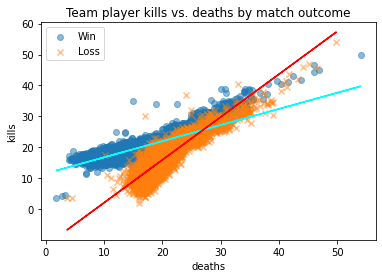

In [44]:
# Create scatterplots to take a closer look at some relationships b/w features.
_ = plt.scatter(x = df_team_win.deaths, y = df_team_win.kills, marker = 'o', alpha = 0.5)
_ = plt.scatter(x = df_team_loss.deaths, y = df_team_loss.kills, marker = 'x', alpha = 0.5)
_ = plt.xlabel('deaths')
_ = plt.ylabel('kills')
_ = plt.title('Team player kills vs. deaths by match outcome')
_ = plt.legend(['Win', 'Loss'], loc = 'upper left')
a, b = np.polyfit(df_team_win.deaths, df_team_win.kills, 1)
_ = plt.plot(df_team_win.deaths, a*df_team_win.deaths+b, color = 'cyan')
a2, b2 = np.polyfit(df_team_loss.deaths, df_team_loss.kills, 1)
_ = plt.plot(df_team_loss.deaths, a2*df_team_loss.deaths+b2, color = 'red')

The plot above shows that for both win and loss data, as kills increase, so do deaths. Once again, more deaths translates to more rounds being played, and therefore more opportunities for kills to be made. The relationships are identical for the win and loss data (r=0.85) and the number of deaths increases at a faster rate.

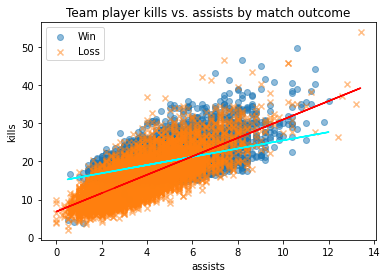

In [45]:
# Create scatterplots to take a closer look at some relationships b/w features.
_ = plt.scatter(x = df_team_win.assists, y = df_team_win.kills, marker = 'o', alpha = 0.5)
_ = plt.scatter(x = df_team_loss.assists, y = df_team_loss.kills, marker = 'x', alpha = 0.5)
_ = plt.xlabel('assists')
_ = plt.ylabel('kills')
_ = plt.title('Team player kills vs. assists by match outcome')
_ = plt.legend(['Win', 'Loss'], loc = 'upper left')
a, b = np.polyfit(df_team_win.assists, df_team_win.kills, 1)
_ = plt.plot(df_team_win.assists, a*df_team_win.assists+b, color = 'cyan')
a2, b2 = np.polyfit(df_team_loss.assists, df_team_loss.kills, 1)
_ = plt.plot(df_team_loss.assists, a2*df_team_loss.assists+b2, color = 'red')

The win data has a higher correlation (r=0.75) than the loss data (r=0.49). In both cases, as kills increase so do assists.

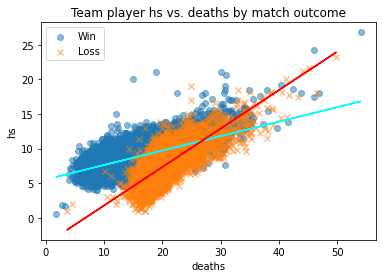

In [46]:
# Create scatterplots to take a closer look at some relationships b/w features.
_ = plt.scatter(x = df_team_win.deaths, y = df_team_win.hs, marker = 'o', alpha = 0.5)
_ = plt.scatter(x = df_team_loss.deaths, y = df_team_loss.hs, marker = 'x', alpha = 0.5)
_ = plt.xlabel('deaths')
_ = plt.ylabel('hs')
_ = plt.title('Team player hs vs. deaths by match outcome')
_ = plt.legend(['Win', 'Loss'], loc = 'upper left')
a, b = np.polyfit(df_team_win.deaths, df_team_win.hs, 1)
_ = plt.plot(df_team_win.deaths, a*df_team_win.deaths+b, color = 'cyan')
a2, b2 = np.polyfit(df_team_loss.deaths, df_team_loss.hs, 1)
_ = plt.plot(df_team_loss.deaths, a2*df_team_loss.deaths+b2, color = 'red')

The correlation for these variables with the win data is smaller (r=0.59) than with the loss data (r=0.74). In both cases, as deaths increase so do headshots. We can explain this by understanding that with more rounds in a game comes more opportunity.

In [47]:
# Test if kills are useful in predicting match outcomes by performing a hypothesis test comparing win/loss.
# Both kill distributions for the team data are roughly normal, so we will use a 2-sample t-test.
# Check variances to set options in t-test.
print('Variances ', np.var(df_team_win.kills), np.var(df_team_loss.kills))
print('Means: ', df_team_win.kills.mean(), df_team_loss.kills.mean())

Variances  8.403261472566486 22.156758058216454
Means:  19.724836228874356 15.616063692331037


We will use the rule of thumb that since the ratio of variances in smaller than 4, the equal_var parameter will be set to true in the t-test.

In [48]:
ttest_ind(df_team_win.kills, df_team_loss.kills, equal_var=True)

Ttest_indResult(statistic=85.26229859459725, pvalue=0.0)

The result of the t-test means that we can reject the null hypothesis and that we have evidence that the average amount of kills for the win data is significantly different than that for the loss data. This means that it will most likely be useful in predicting match outcomes.

### Team Performance - Combined Win/Loss Data

In [49]:
# Summary statistics (wins and losses combined).
df_team.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,26319.0,2.319658e+06,10326.987219,2.300412e+06,2311276.50,2319490.00,2327783.50,2339828.00
kills,26319.0,1.767084e+01,4.415874,2.000000e+00,15.40,18.20,20.00,54.00
assists,26319.0,4.117936e+00,1.467370,0.000000e+00,3.00,4.00,5.00,13.40
deaths,26319.0,1.767860e+01,4.435533,1.800000e+00,15.40,18.20,20.00,54.00
hs,26319.0,8.005279e+00,2.108221,6.000000e-01,6.60,8.00,9.20,26.80
flash_assists,26319.0,1.010455e+00,0.599193,0.000000e+00,0.60,1.00,1.20,5.80
kast,26319.0,6.927851e+01,9.868522,2.940000e+01,62.86,69.66,76.00,98.76
kddiff,26319.0,-7.761609e-03,4.937033,-1.400000e+01,-4.00,0.00,4.00,20.00
adr,26319.0,7.474837e+01,9.659315,1.765000e+01,68.42,74.84,81.24,118.90
fkdiff,26319.0,1.336804e-03,1.223714,-4.500000e+00,-0.80,0.00,0.80,5.00


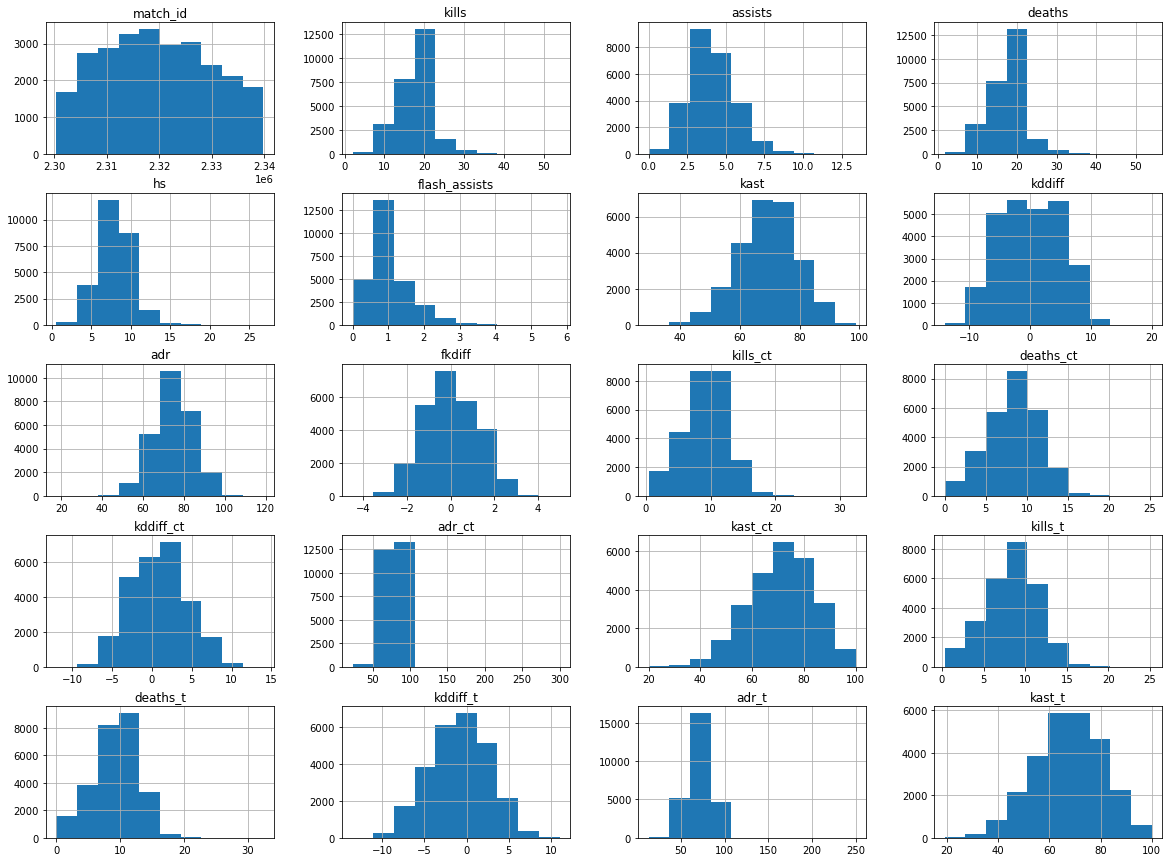

In [50]:
# Histogram for team features (wins and losses combined).
_ = df_team.hist(bins = 10, figsize = (20,15))

<AxesSubplot:>

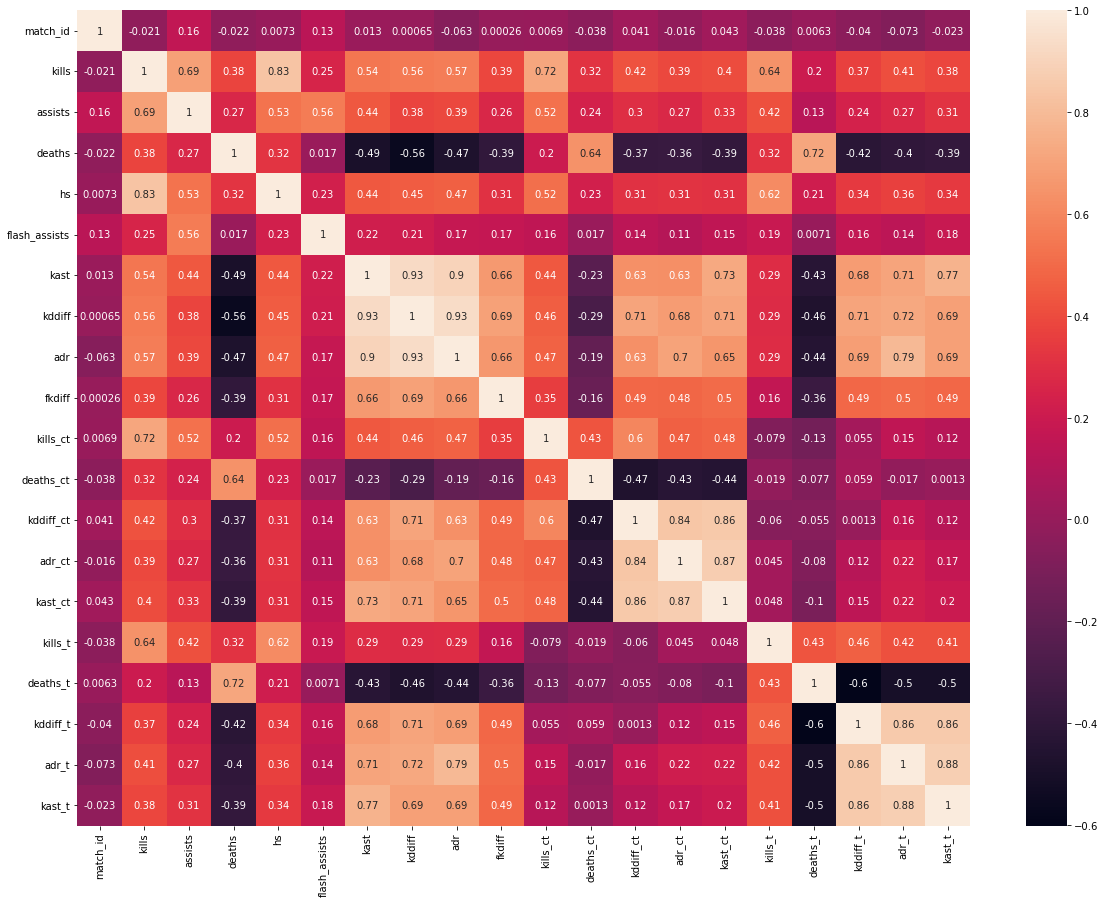

In [51]:
# Correlation heatmap (wins and losses combined).
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_team.corr(), annot = True)